# Assignment 1

### Name: 

The objective of this assignment is to ensure students are familiar with Python programming language and key toolboxes such as NumPy, Matplotlib, Seaborn, and Pandas, which are commonly used in biomedical applications of machine learning.

## Question 1 (10 pts)

Write a Python script that:

- Prompts the user to enter their name. (2.5 pts)

In [1]:
name = input("Please enter your name:")

- Greets the user with a personalized message. (2.5 pts) 

In [4]:
print(f"Hello, {name}")

Hello, David Wong


- Asks the user to enter two numbers and computes their sum, product, and quotient. (2.5 pts)

In [6]:
numbers = input("Enter two numbers seperated by a space:")
n1, n2 = numbers.split(" ")
n1, n2 = float(n1), float(n2)
sum = n1 + n2
prod = n1 * n2
quot = n1 / n2

- Prints the results. (2.5 pts)

In [7]:
print(f"Sum: {sum}")
print(f"Product: {prod}")
print(f"Quaotient: {quot}")

Sum: 3.0
Product: 2.0
Quaotient: 0.5


## Question 2 (30 pts)

- Load the Iris dataset from sklearn.datasets using NumPy. (5 pts)

In [8]:
from sklearn import datasets
iris = datasets.load_iris()

* Compute and print the mean, median, and standard deviation of each feature (sepal length, sepal width, petal length, petal width) for each class. (15 pts)
    * Note  this should be done in a loop and nothing should be hard coded.


In [27]:
import numpy as np

for i in range(len(iris.feature_names)):
    print(f"{iris.feature_names[i]} mean: {np.mean(iris.data[:,i])}")
    print(f"{iris.feature_names[i]} median: {np.median(iris.data[:,i])}")
    print(f"{iris.feature_names[i]} standard deviation: {np.std(iris.data[:,i])}")

sepal length (cm) mean: 5.843333333333334
sepal length (cm) median: 5.8
sepal length (cm) standard deviation: 0.8253012917851409
sepal width (cm) mean: 3.0573333333333337
sepal width (cm) median: 3.0
sepal width (cm) standard deviation: 0.4344109677354946
petal length (cm) mean: 3.7580000000000005
petal length (cm) median: 4.35
petal length (cm) standard deviation: 1.759404065775303
petal width (cm) mean: 1.1993333333333336
petal width (cm) median: 1.3
petal width (cm) standard deviation: 0.7596926279021594


- Plot a scatter plot of sepal length vs. sepal width, color-coded by class. (10 pts)
    - Note this should be done in a loop and nothing should be hard coded.


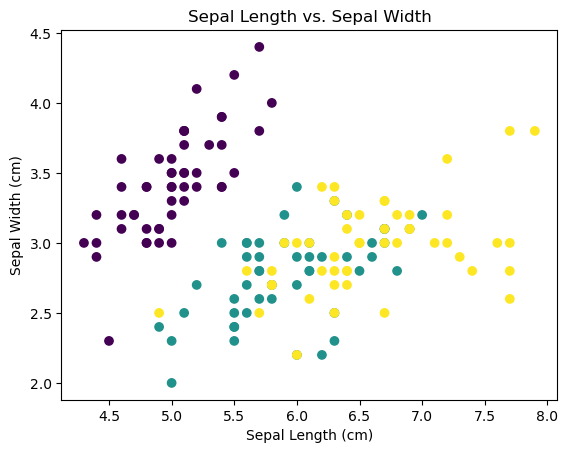

In [29]:
import matplotlib.pyplot as plt

plt.scatter(x = iris.data[:,0], y = iris.data[:,1], c = iris.target)
plt.title("Sepal Length vs. Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

## Question 3 (25 pts)

- Load the Iris dataset using Pandas. (5 pts)

In [67]:
import pandas as pd

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

- Using Matplotlib, create a histogram of petal length, petal width, sepal length, and sepal width. (10 pts)
    - Plot each one on its own separate axis
    - Note this should be done in a loop and nothing should be hard coded.


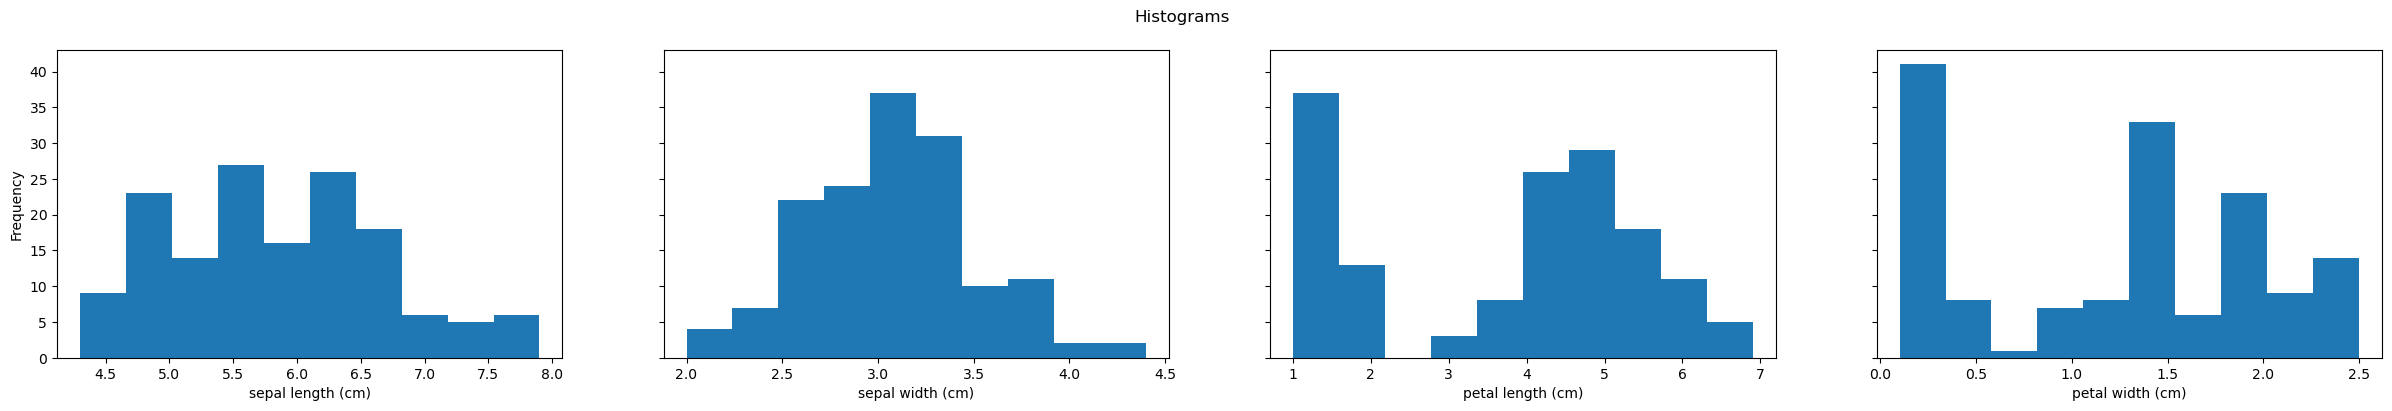

In [68]:
num_features = len(df.columns)
fig, axes = plt.subplots(1, num_features, figsize=(30, num_features), sharey=True)

for i, column in enumerate(df.columns):
    axes[i].hist(df[column])
    axes[i].set_xlabel(column)
    if i == 0:
        axes[i].set_ylabel("Frequency")

fig.suptitle("Histograms")
plt.show()

- Using Seaborn, create a pairplot of the Iris dataset, color-coded by class. (10 pts)
    - Make sure the legend lists the type of flower by name and not by number


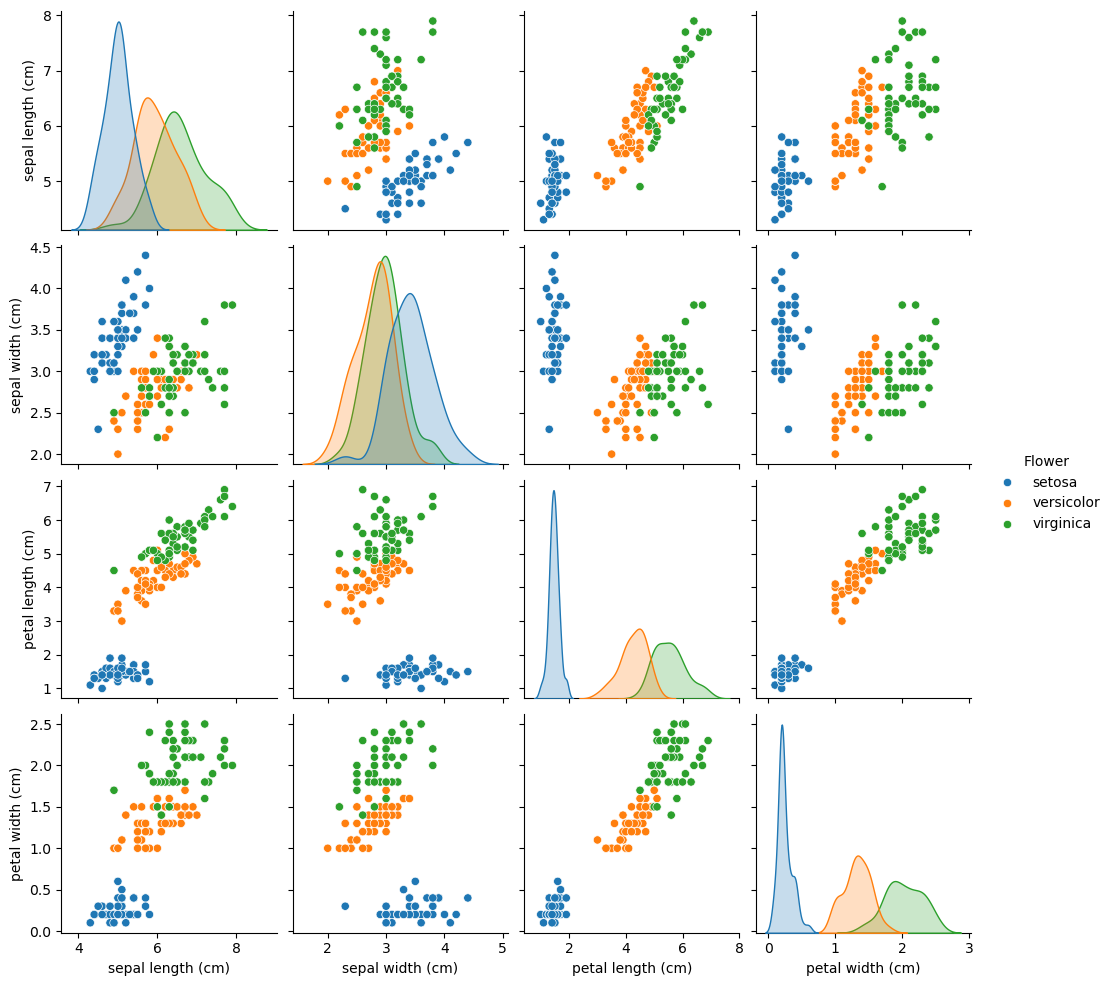

In [65]:
df['Flower'] = [iris.target_names[i] for i in iris.target]

import seaborn as sns

sns_plot = sns.pairplot(df, hue="Flower")

## Question 4 (20 pts)
Load the Breast Cancer Wisconsin (Diagnostic) dataset from the datasets folder on Canvas (breastcancer_tumor_classification.csv). Do not hardcode the path when you read the csv file. Rather have the path as a separate variable that can easily be changed. This will help the graders grade your assignment. 


In [112]:
import os
# this assumes that there is only one csv file and that it is in the same directory as this notebook
csv_files = [f for f in os.listdir() if f.endswith('.csv')]
df = pd.read_csv(csv_files[0])

- Display the first 5 rows of the dataset. (5 pts)

In [113]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


- Check for missing values and handle them appropriately. (5 pts)

In [114]:
for col in df.columns:
    if "Unnamed" in col:
        df = df.drop(columns=col)

if df.isnull().values.any():
    print("Has missing values")
else:
    print("Has no missing values")

Has no missing values


- Drop the 'id' column as it's not relevant for analysis. (5 pts)

In [115]:
df = df.drop(columns='id')

- Encode the 'diagnosis' column to binary labels (Malignant: 1, Benign: 0). (5 pts)

In [116]:
df['diagnosis'] = [1 if i == 'M' else 0 for i in df['diagnosis']]

- Compute and print the mean, median, and standard deviation of 'radius_mean' for each class (Malignant and Benign). (5 pts)
    - Print each of the mean, median and standard deviation on the same line for each class (e.g. The mean radius mean for malignant is xx.x and for benign is yy.y)
    - Print the values up to 1 decimal place


In [122]:
mal_df = df[df['diagnosis'] == 1]
ben_df = df[df['diagnosis'] == 0]
print(f"The mean radius for malignant is {np.mean(mal_df['radius_mean']):.1f} and for benign is {np.mean(ben_df['radius_mean']):.1f}")
print(f"The standard deviation radius for malignant is {np.std(mal_df['radius_mean']):.1f} and for benign is {np.std(ben_df['radius_mean']):.1f}")

The mean radius for malignant is 17.5 and for benign is 12.1
The standard deviation radius for malignant is 3.2 and for benign is 1.8


Notes:
* Submit your assignment as this completeda single Jupyter Notebook. Submit the pdf printout of the notebook as well as python noteboook. **You must submit the PDF printout.**
* Make sure you follow the best practices for coding (5 pts)
* Make sure you label all axes and legends (10 pt)
* Collaboration with peers is allowed, but each student must submit their own individual solution.
